## Full Feature Extraction Pipeline

In [2]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

import os 
import sys

sys.path.append(os.path.abspath('../ANN-code'))

from image_preprocessing import noise_adder, gaussian_smoothing
from data_methods import create_file_paths
from bb_event import Event

from feature_extraction import extract_sum_intensity, extract_max_intensity
from feature_extraction import extract_axis, extract_recoil_angle
from feature_extraction import extract_intensity_profile
from feature_extraction import extract_length


In [3]:
# Import the images & create file paths

image_dirs = ['../ANN-code/Data/im0/C', '../ANN-code/Data/im0/F']

image_paths = create_file_paths(image_dirs)

# Smaller sample for this demonstration
image_paths = image_paths[:1000]


100%|██████████| 9999/9999 [00:00<00:00, 1634851.51it/s]


In [4]:
# Preprocessing 1 (Event instantiation)

events = []

for path in image_paths:
    events.append(Event(path, np.load(path)))


In [5]:
# Preprocessing 2 (Noise addition)

dark_dir = "../ANN-code/Data/darks"
dark_list_number = 0 # change for each directory
m_dark = np.load(f"{dark_dir}/master_dark_1x1.npy")
example_dark_list = np.load(
    f"{dark_dir}/quest_std_dark_{dark_list_number}.npy"
)

for event in events:
    event.image = noise_adder(event.image, m_dark, example_dark_list)


In [6]:
# Preprocessing 3 (Smoothing)

smoothing_sigma = 3.5

for event in events:
    event.image = gaussian_smoothing(event.image, smoothing_sigma)


In [7]:
# Feature Extraction

import pandas as pd

# Define column names
columns = [
    "file_name", "sum_intensity_camera", "max_intensity_camera", "recoil_angle_camera", 
    "recoil_length_camera", "mean_energy_deposition_camera", "std_energy_deposition_camera",
    "skew_energy_deposition_camera", "kurt_energy_deposition_camera", 
]

features_df = pd.DataFrame(columns=columns)

print(features_df)

Empty DataFrame
Columns: [file_name, sum_intensity_camera, max_intensity_camera, recoil_angle_camera, recoil_length_camera, mean_energy_deposition_camera, std_energy_deposition_camera, skew_energy_deposition_camera, kurt_energy_deposition_camera]
Index: []


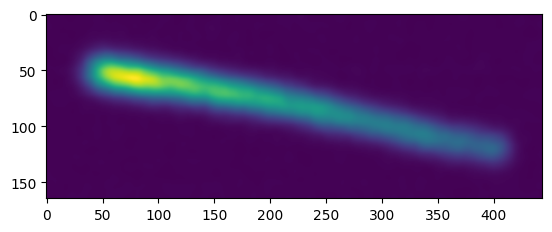

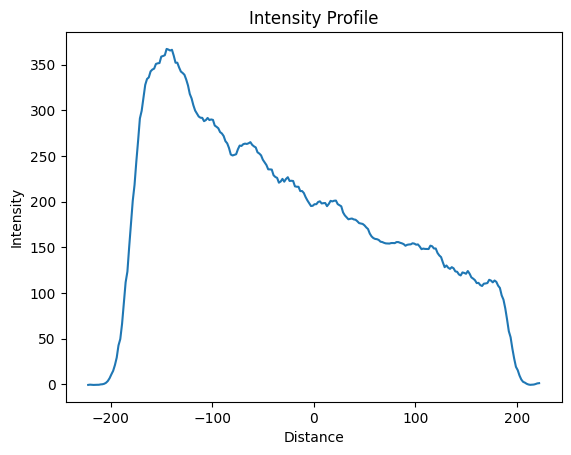

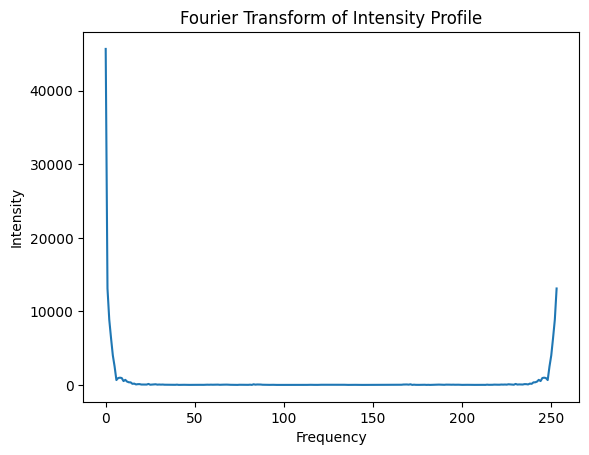

/Users/benstevens/MIGDAL/NR-ANN/venv/lib/python3.12/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/benstevens/MIGDAL/NR-ANN/venv/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


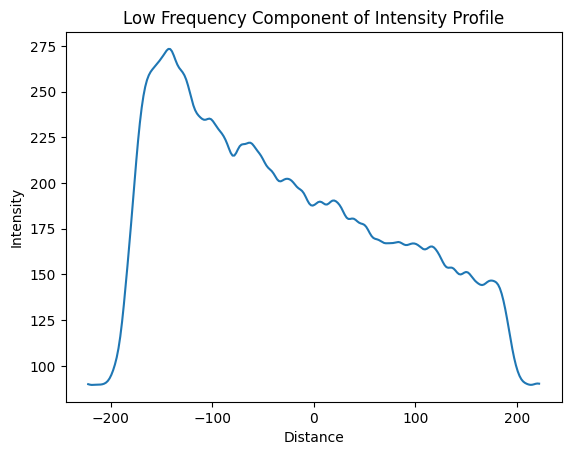

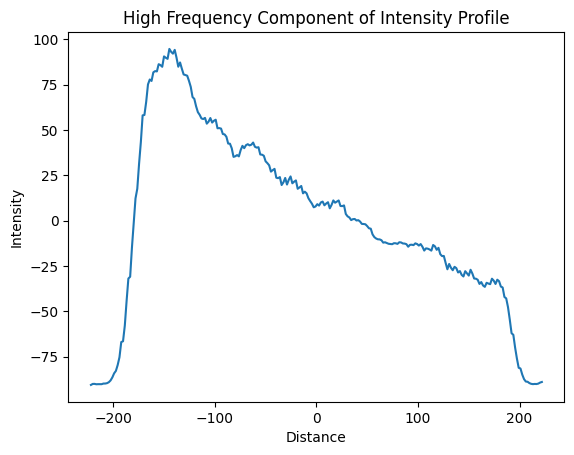

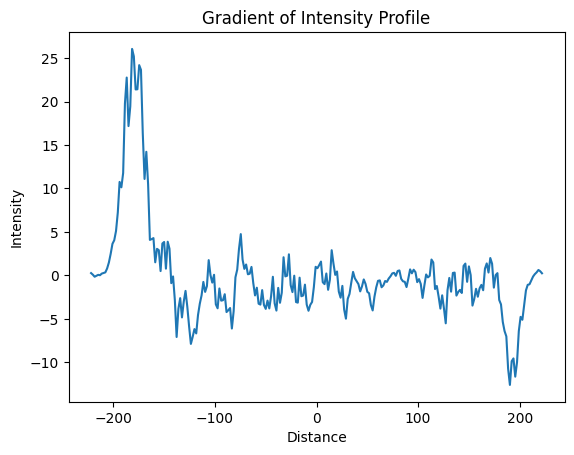

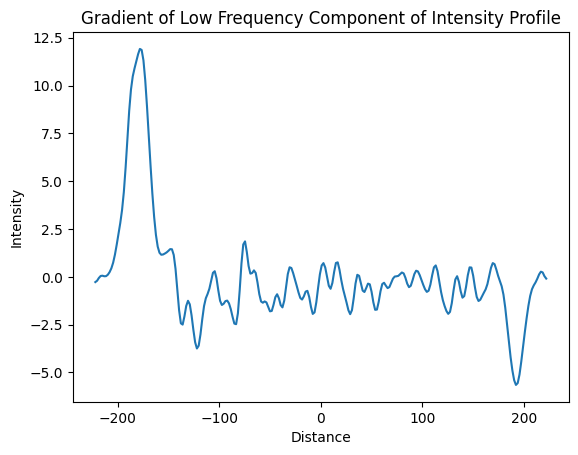

(0.00035895508187726505-0.00016379855576669402j)
0.008500091051377416


In [ ]:
# basic features
sum_intensity_camera = extract_sum_intensity(events[0].image)
max_intensity_camera = extract_max_intensity(events[0].image)

# axis features
axis_camera, centroid_camera = extract_axis(events[0].image)
recoil_angle_camera = extract_recoil_angle(axis_camera)

# intensity profile features
distances, intensities = extract_intensity_profile(events[0].image, principal_axis=axis_camera, centroid=centroid_camera)

recoil_length_camera = extract_length(events[0].image, distances=distances, intensities=intensities)

mean_energy_deposition_camera = np.mean(intensities)
std_energy_deposition_camera = np.std(intensities)
skew_energy_deposition_camera = sp.stats.skew(intensities)
kurt_energy_deposition_camera = sp.stats.kurtosis(intensities)

head_tail_mean_difference_camera = np.mean(intensities[:len(intensities)//2]) - np.mean(intensities[len(intensities)//2:])

# numerical derivative of intensity profile
grad = np.gradient(intensities)

mean_energy_deposition_gradient_camera = np.mean(grad)





In [9]:
for event in events:
    features_df = features_df.append({
        "file_name": event.file_path,
        "sum_intensity_camera": extract_sum_intensity(event.image),
        "max_intensity_camera": extract_max_intensity(event.image),
        "recoil_angle_camera": 
        "recoil_length_camera": 
        "mean_energy_deposition_camera": 
        "std_energy_deposition_camera": 
        "skew_energy_deposition_camera": 
        "kurt_energy_deposition_camera": 
    }, ignore_index=True)

SyntaxError: invalid syntax (431754728.py, line 7)